<a href="https://colab.research.google.com/github/abhiram27/DIP/blob/main/DIP_Question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

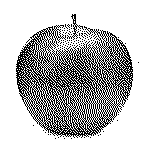

In [5]:
from PIL import Image
import numpy as np
from PIL import Image
import IPython.display as display

def floyd_steinberg_dithering(image):
    # Convert image to grayscale
    img = image.convert("L")
    pixels = np.array(img, dtype=float) # Convert to float for calculations
    rows, cols = pixels.shape
    # Loop through each pixel
    for y in range(rows):
        for x in range(cols):
            old_pixel = pixels[y, x]
            new_pixel = 255 if old_pixel > 127 else 0
            pixels[y, x] = new_pixel
            quant_error = old_pixel - new_pixel
            # Distribute the quantization error
            if x + 1 < cols:
                pixels[y, x + 1] += quant_error * 7 / 16.0
            if y + 1 < rows:
                if x - 1 >= 0:
                    pixels[y + 1, x - 1] += quant_error * 3 / 16.0
                pixels[y + 1, x] += quant_error * 5 / 16.0
                if x + 1 < cols:
                    pixels[y + 1, x + 1] += quant_error * 1 / 16.0
    # Clip the pixel values to the valid range [0, 255]
    pixels = np.clip(pixels, 0, 255)
    return Image.fromarray(pixels.astype(np.uint8))

# Load the image and apply Floyd-Steinberg dithering
image = Image.open('apple.png') # Replace 'image.jpg' with your image file path
fs_dithered_image = floyd_steinberg_dithering(image)
# Display the dithered image
display.display(fs_dithered_image)

# Save the dithered image
fs_dithered_image.save('fs_dithered_image.png')

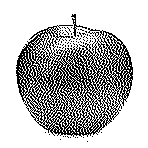

In [6]:
from PIL import Image
import numpy as np

def jarvis_judice_ninke_dithering(image):
    # Convert image to grayscale
    img = image.convert("L")
    pixels = np.array(img, dtype=float)
    # Get dimensions of the image
    rows, cols = pixels.shape
    # Define Jarvis-Judice-Ninke filter matrix (error diffusion kernel)
    kernel = np.array([[0, 0, 0, 7, 5],
                       [3, 5, 7, 5, 3],
                       [1, 3, 5, 3, 1]]) / 48.0
    # Loop through each pixel
    for y in range(rows):
        for x in range(cols):
            old_pixel = pixels[y, x]
            new_pixel = 255 * (old_pixel // 128)
            pixels[y, x] = new_pixel
            quant_error = old_pixel - new_pixel
            # Diffuse the quantization error according to the kernel
            for ky in range(3):
                for kx in range(5):
                    ny = y + ky
                    nx = x + kx - 2 # Center the kernel over the current pixel
                    if ny < rows and 0 <= nx < cols:
                        pixels[ny, nx] += quant_error * kernel[ky, kx]
    # Convert the result back to an image and return it
    return Image.fromarray(np.clip(pixels, 0, 255).astype(np.uint8))

# Load the image and apply Jarvis-Judice-Ninke dithering
image = Image.open('apple.png') # Replace 'image.jpg' with your image file path
jjn_dithered_image = jarvis_judice_ninke_dithering(image)
# Display the dithered image
display.display(jjn_dithered_image)
# Optionally, save the dithered image
jjn_dithered_image.save('jjn_dithered_image.png')